In [1]:
import pandas as pd 
import dask.dataframe as dd
import os
from tqdm import tqdm

TRAIN_PATH = 'texi_train/train.csv'

In [2]:
## 총 열 알려주는거 같은데... 작동을 안하네;
# %%time
# with open(TRAIN_PATH) as file:
#     n_rows = len(file.readlines())

# print (f'Exact number of rows: {n_rows}')

In [3]:
# 데이터 맛보기
df_tmp = pd.read_csv(TRAIN_PATH, nrows=5)
df_tmp.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
del df_tmp

In [2]:
# 전체 행 데이터 불러오기
# Set columns to most suitable type to optimize for memory usage
traintypes = {'fare_amount': 'float32',
              'pickup_datetime': 'str', 
              'pickup_longitude': 'float32',
              'pickup_latitude': 'float32',
              'dropoff_longitude': 'float32',
              'dropoff_latitude': 'float32',
              'passenger_count': 'uint8'}

cols = list(traintypes.keys())

chunksize = 10_000_000

In [3]:
%%time
df_list = [] # list to hold the batch dataframe

for df_chunk in tqdm(pd.read_csv(TRAIN_PATH, usecols=cols, dtype=traintypes, chunksize=chunksize)):
     
    # Neat trick from https://www.kaggle.com/btyuhas/bayesian-optimization-with-xgboost
    # Using parse_dates would be much slower!
    df_chunk['pickup_datetime'] = df_chunk['pickup_datetime'].str.slice(0, 16)
    df_chunk['pickup_datetime'] = pd.to_datetime(df_chunk['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    
    # Can process each chunk of dataframe here
    # clean_data(), feature_engineer(),fit()
    
    # Alternatively, append the chunk to list and merge all
    df_list.append(df_chunk) 

6it [02:15, 22.56s/it]

Wall time: 2min 15s


In [4]:
# 데이터 확인(1.5GB)
# Merge all dataframes into one dataframe
train_df = pd.concat(df_list)

# Delete the dataframe list to release memory
del df_list

# See what we have loaded
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 7 columns):
 #   Column             Dtype              
---  ------             -----              
 0   fare_amount        float32            
 1   pickup_datetime    datetime64[ns, UTC]
 2   pickup_longitude   float32            
 3   pickup_latitude    float32            
 4   dropoff_longitude  float32            
 5   dropoff_latitude   float32            
 6   passenger_count    uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 1.5 GB


In [5]:
# 원본파일 놔두고 새로 만들기
data = train_df

In [8]:
# 불러온 데이터 확인
# 7 칼럼, 55423856(약 오천만) 행
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1
...,...,...,...,...,...,...,...
55423851,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740028,-73.963280,40.762554,1
55423852,4.2,2009-03-24 20:46:00+00:00,-73.957787,40.765530,-73.951637,40.773960,1
55423853,14.1,2011-04-02 22:04:00+00:00,-73.970505,40.752323,-73.960541,40.797340,1
55423854,28.9,2011-10-26 05:57:00+00:00,-73.980904,40.764629,-73.870605,40.773964,1


In [6]:
# 데이터 파악 : 결측치 확인
data.isna().sum()

fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

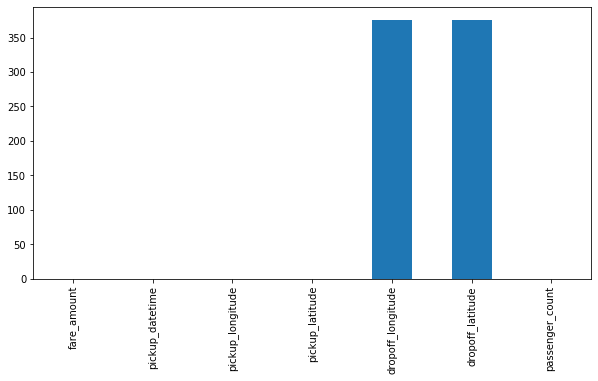

In [13]:
plt.figure(figsize=(10,5))
data.isna().sum().plot.bar()

In [9]:
#  dropoff_longitude , dropoff_latitude의 결측치 제거
data = data[data['dropoff_longitude'].notnull()]
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1
...,...,...,...,...,...,...,...
55423851,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740028,-73.963280,40.762554,1
55423852,4.2,2009-03-24 20:46:00+00:00,-73.957787,40.765530,-73.951637,40.773960,1
55423853,14.1,2011-04-02 22:04:00+00:00,-73.970505,40.752323,-73.960541,40.797340,1
55423854,28.9,2011-10-26 05:57:00+00:00,-73.980904,40.764629,-73.870605,40.773964,1


In [11]:
data.describe()
# 결과적으로 봤을때 눈으로 보이는 부분 
# 1. 승객수가 0 이하인 경우 발견
# 2. 운임요금의 최소값이 - 인 부분 발견
# 3. 위도 경도 값들의 최소값과 최대값이 두드러지게 이상한점 확인

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07
mean,8.077908e+00,-3.875316e+01,1.937341e+01,-3.875261e+01,1.937341e+01,1.685391e+00
std,2.055130e+01,2.556211e+01,1.414239e+01,2.553839e+01,1.412191e+01,1.327662e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396368e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [14]:
data[data['passenger_count']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.000000,2015-06-02 23:16:00+00:00,-73.974899,40.751095,-73.908546,40.881878,0
566,4.900000,2012-01-28 21:33:00+00:00,-73.955322,40.782841,-73.955795,40.773674,0
678,6.500000,2012-02-27 07:24:00+00:00,-73.983398,40.738182,-73.971397,40.758022,0
1160,13.300000,2011-05-25 23:58:00+00:00,-73.998360,40.740349,-73.946457,40.777348,0
1935,10.100000,2011-10-23 11:09:00+00:00,-73.971397,40.794998,-73.967903,40.768600,0
...,...,...,...,...,...,...,...
55422287,17.700001,2011-07-31 15:25:00+00:00,-73.975098,40.681000,-73.980301,40.742401,0
55422918,11.700000,2011-10-19 18:46:00+00:00,-73.985199,40.755901,-73.972000,40.764702,0
55422965,6.900000,2012-02-08 23:52:00+00:00,-74.004173,40.751831,-73.994316,40.738853,0
55422985,6.500000,2011-10-21 10:21:00+00:00,-73.982300,40.768101,-73.968201,40.760399,0


In [10]:
# 전처리_1. 승객수가 0보다 작은 이상치 제거
data = data[data['passenger_count']>0]
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1
...,...,...,...,...,...,...,...
55423851,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740028,-73.963280,40.762554,1
55423852,4.2,2009-03-24 20:46:00+00:00,-73.957787,40.765530,-73.951637,40.773960,1
55423853,14.1,2011-04-02 22:04:00+00:00,-73.970505,40.752323,-73.960541,40.797340,1
55423854,28.9,2011-10-26 05:57:00+00:00,-73.980904,40.764629,-73.870605,40.773964,1


In [11]:
# 승객 수 필요없을것 으로 판단 제거
data = data.drop("passenger_count", axis=1)
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276
1,16.9,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561
3,7.7,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764
...,...,...,...,...,...,...
55423851,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740028,-73.963280,40.762554
55423852,4.2,2009-03-24 20:46:00+00:00,-73.957787,40.765530,-73.951637,40.773960
55423853,14.1,2011-04-02 22:04:00+00:00,-73.970505,40.752323,-73.960541,40.797340
55423854,28.9,2011-10-26 05:57:00+00:00,-73.980904,40.764629,-73.870605,40.773964


In [15]:
data[data["fare_amount"]<=0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.9,2010-03-09 23:37:00+00:00,-73.789452,40.643497,-73.788666,40.641953,1
2486,-2.5,2015-03-22 05:14:00+00:00,-74.000031,40.720631,-73.999809,40.720539,1
10002,0.0,2010-02-15 14:26:00+00:00,-73.987114,40.738808,-74.005913,40.713959,1
13032,-3.0,2013-08-30 08:57:00+00:00,-73.995064,40.740753,-73.995888,40.741356,4
27891,0.0,2015-05-15 21:40:00+00:00,-74.077927,40.805714,-74.077919,40.805721,1
...,...,...,...,...,...,...,...
55362314,0.0,2013-08-06 22:39:00+00:00,-74.025085,40.750984,-74.028107,40.754944,1
55367495,-3.7,2010-02-24 18:41:00+00:00,-73.978691,40.777599,-73.981667,40.774200,1
55374021,0.0,2015-04-27 15:05:00+00:00,-73.994972,40.755409,-73.996040,40.755360,2
55392914,0.0,2010-03-11 14:07:00+00:00,-73.799698,40.645405,-73.787529,40.645691,1


In [12]:
# 전처리_2. 요금이 0이하인 경우 제거
data = data[data["fare_amount"]>0]
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276
1,16.9,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561
3,7.7,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764
...,...,...,...,...,...,...
55423851,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740028,-73.963280,40.762554
55423852,4.2,2009-03-24 20:46:00+00:00,-73.957787,40.765530,-73.951637,40.773960
55423853,14.1,2011-04-02 22:04:00+00:00,-73.970505,40.752323,-73.960541,40.797340
55423854,28.9,2011-10-26 05:57:00+00:00,-73.980904,40.764629,-73.870605,40.773964


In [13]:
data = data.reset_index()
# 데이터가 너무 커서 3개로 분할하기
data1 = data[data["index"]%3 == 0]
data2 = data[data["index"]%3 == 1]
data3 =data[data["index"]%3 == 2]

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18408279 entries, 0 to 55224623
Data columns (total 7 columns):
 #   Column             Dtype              
---  ------             -----              
 0   index              int64              
 1   fare_amount        float32            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float32            
 4   pickup_latitude    float32            
 5   dropoff_longitude  float32            
 6   dropoff_latitude   float32            
dtypes: datetime64[ns, UTC](1), float32(5), int64(1)
memory usage: 772.4 MB


In [19]:
del data1

In [20]:
import bz2
import pickle
import _pickle as cPickle
def compressed_pickle(title, data):
    with bz2.BZ2File(title+'.pbz2', 'w') as f:
        cPickle.dump(data, f)
# 파일명과, 저장을 원하는 데이터
compressed_pickle('texi_train/2train1_1', data2)


In [21]:
compressed_pickle('texi_train/3train1_1', data3)

In [18]:
data1.to_csv("texi_train/1train1_1.csv", index=False)
#data2.to_csv("texi_train/2train1_1.csv", index=False)
#data3.to_csv("texi_train/3train1_1.csv", index=False)

In [16]:
# 좌표데이터 확인작업
data[data["pickup_latitude"]<-2000]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
150559,25.299999,2012-08-03 07:43:00+00:00,0.000000,-3116.285400,-73.953598,40.787998
1340837,10.100000,2011-06-09 10:39:00+00:00,2434.238525,-3458.664795,-1281.933838,-104.637650
2037003,7.300000,2011-05-22 17:08:00+00:00,-2995.982422,-2847.702393,-1265.146729,-16.566551
2612104,4.500000,2011-09-10 09:35:00+00:00,408.352386,-3488.079590,408.352386,-3488.079590
2862434,6.500000,2011-06-18 02:46:00+00:00,976.004089,-3258.765625,2072.104980,-834.462280
...,...,...,...,...,...,...
53382842,5.300000,2011-08-19 06:42:00+00:00,-912.859741,-2586.287598,-912.859741,-2586.287598
54117615,6.500000,2012-12-13 11:05:00+00:00,0.000000,-3111.708740,0.000000,40.769016
54414639,4.900000,2011-10-22 08:25:00+00:00,-3370.710449,-2920.439453,-3036.573486,-1200.788452
54609376,11.700000,2011-09-21 17:23:00+00:00,12.688030,-2474.452393,12.688030,-2474.452393


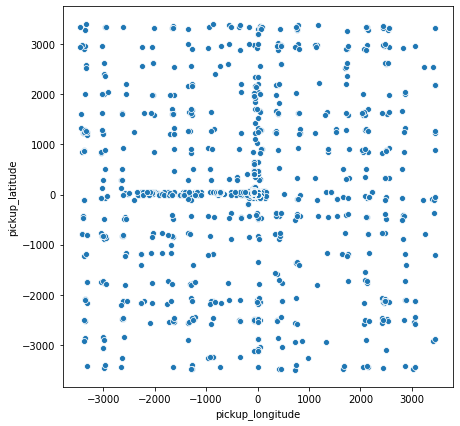

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# 탑승 좌표 데이터 그래프 플랏 결과 좌표 데이터의 이상치가 시각적으로 필터링 하기엔 너무 넓게 퍼진것을 확인
plt.figure(figsize=(7,7))
sns.scatterplot(data=data, x="pickup_longitude", y="pickup_latitude")

In [18]:
#하차 좌표
plt.figure(figsize=(7,7))
sns.scatterplot(data=data, x="dropoff_longitude", y="dropoff_latitude")

MemoryError: Unable to allocate 1.65 GiB for an array with shape (4, 55224625) and data type object

<Figure size 504x504 with 0 Axes>

In [21]:
# 3. 플랏결과 이상치가 너무 넓게 분포함을 확인하고 실제 뉴욕 좌표범위를 바탕으로 필터링
left_end = -74.28
right_end = -73.67
top_end = 40.93
bottom_end = 40.48
data[(data["pickup_longitude"] <right_end) & (data["pickup_longitude"] > left_end)]
# data = data[data["dropoff_longitude"] <right_end && data["dropoff_longitude"] > left_end]
# data = data[data["pickup_latitude"] <top_end && data["pickup_latitude"] > bottom_end]
# data = data[data["dropoff_latitude"] <top_end && data["dropoff_latitude"] > bottom_end]


MemoryError: Unable to allocate 1.01 GiB for an array with shape (5, 54094158) and data type float32

In [92]:
# 2. 날짜 데이터 변환
del data3
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55419646 entries, 0 to 55423855
Data columns (total 7 columns):
 #   Column             Dtype              
---  ------             -----              
 0   fare_amount        float32            
 1   pickup_datetime    datetime64[ns, UTC]
 2   pickup_longitude   float32            
 3   pickup_latitude    float32            
 4   dropoff_longitude  float32            
 5   dropoff_latitude   float32            
 6   passenger_count    uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 1.9 GB


In [96]:
data2["year"] = data2["pickup_datetime"].apply(lambda x : x.year)
# data3["month"] = data3.datetime.apply(lambda x : x.month)
# data3["day"] = data3.datetime.apply(lambda x : x.day)
# data3["hour"] = data3.datetime.apply(lambda x : x.hour)
# data3["minute"] = data3.datetime.apply(lambda x : x.minute)
data2

MemoryError: Unable to allocate 423. MiB for an array with shape (55419646,) and data type object